# Import Data

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/Breast Cancer Classification/Fisher-PCA-Rfe/'
data = pd.read_csv(file_path + 'rearranged_data_rfe_rf.csv')
data.columns

Index(['PCA 1', 'PCA 3', 'PCA 4', 'PCA 2', 'PCA 8', 'PCA 11', 'PCA 15',
       'PCA 10', 'PCA 6', 'PCA 19', 'PCA 5', 'PCA 12', 'PCA 7', 'PCA 14',
       'PCA 13', 'PCA 9', 'PCA 16', 'PCA 27', 'PCA 29', 'PCA 17', 'PCA 18',
       'PCA 26', 'PCA 20', 'PCA 28', 'PCA 21', 'PCA 24', 'PCA 25', 'PCA 30',
       'PCA 23', 'PCA 22', 'Class'],
      dtype='object')

In [4]:
data.shape[1]

31

# Select No. of Features

In [5]:
feat_dt = 17

# Decision Tree

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [7]:
# Load the dataset
#data = pd.read_csv('rearranged_data_rfe_rf.csv')

X = data.iloc[:, :feat_dt].values # Features
y = data.iloc[:, -1].values # Labels

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=143017)

In [8]:
# Scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [9]:
# Create a Random Forest classifier and fit it to the training set
classifier = DecisionTreeClassifier(random_state=143017)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=143017)

In [10]:
# Making predictions
y_pred = classifier.predict(X_test)

In [11]:
# Printing confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

n_classes = cm.shape[0]
class_accuracy = []
for i in range(n_classes):
    class_accuracy.append(round(cm[i,i]/np.sum(cm[i,:]), 2))
print("Accuracy of each class: ", class_accuracy)

Confusion matrix:
 [[63  2]
 [ 6 43]]
Accuracy of each class:  [0.97, 0.88]


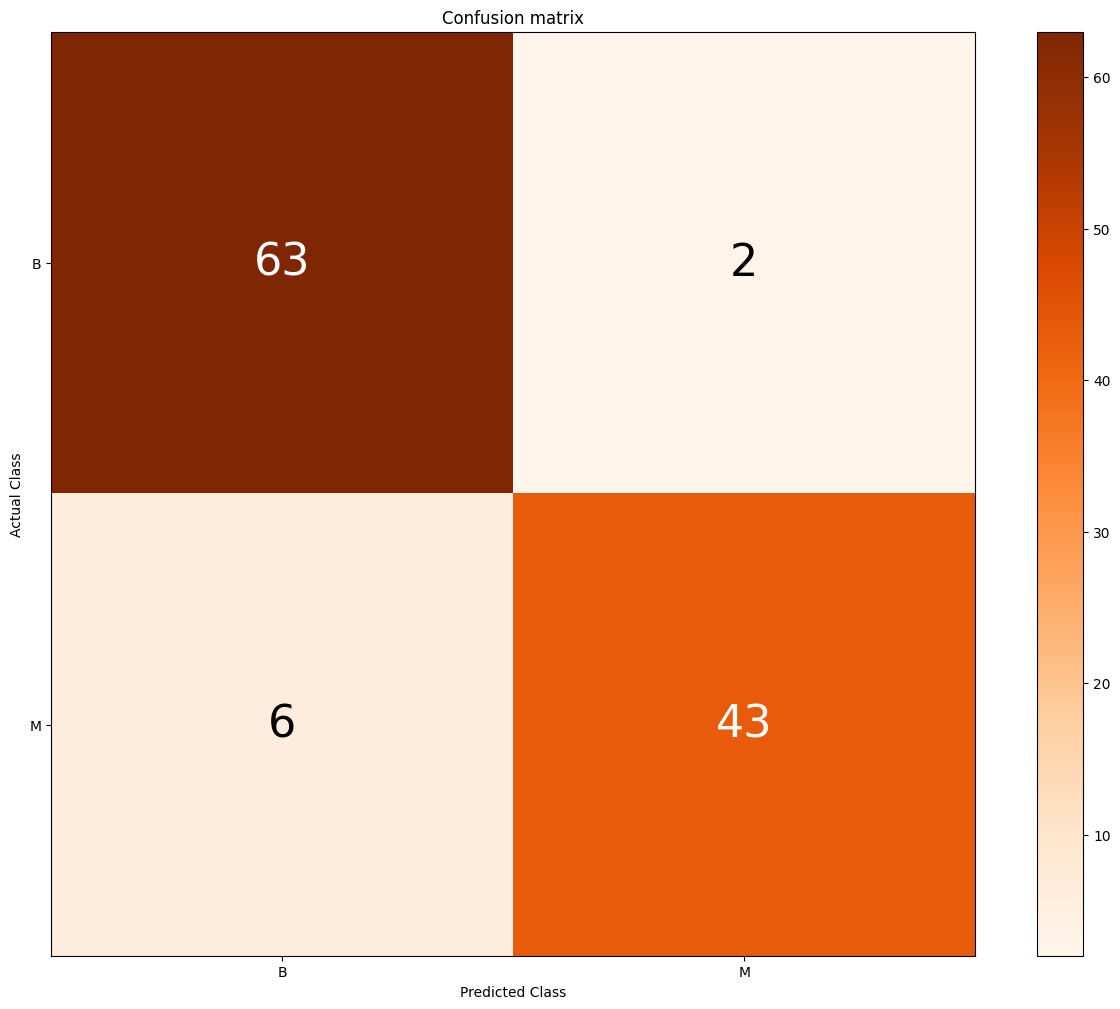

In [12]:
# Plotting confusion matrix
plt.figure(figsize=(16, 12))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, sorted(set(y)))
plt.yticks(tick_marks, sorted(set(y)))
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.annotate(str(cm[i][j]), xy=(j, i),
                     horizontalalignment='center',
                     verticalalignment='center',
                     color='white' if cm[i][j] > (0.5*cm.max()) else 'black',
                     fontsize=32)
plt.rcParams.update({'font.size': 24})
plt.savefig('cm-dt.png')
plt.show()

In [13]:
# Printing classification report
print("Classification report:\n", classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        65
           M       0.96      0.88      0.91        49

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



In [14]:
# Calculating metrics
accuracy_dt = metrics.accuracy_score(y_test, y_pred)
precision_dt = metrics.precision_score(y_test, y_pred, average=None)
recall_dt = metrics.recall_score(y_test, y_pred, average=None)
f1_score_dt = metrics.f1_score(y_test, y_pred, average=None)

In [15]:
# Printing metrics rounded to two decimal points
print("Accuracy:", round(accuracy_dt, 4))
print("Precision:", [round(p, 4) for p in precision_dt], round(sum(precision_dt) / len(precision_dt), 4))
print("Recall:", [round(r, 4) for r in recall_dt], round(sum(recall_dt) / len(recall_dt), 4))
print("F1-Score:", [round(f, 4) for f in f1_score_dt], round(sum(f1_score_dt) / len(f1_score_dt), 4))

Accuracy: 0.9298
Precision: [0.913, 0.9556] 0.9343
Recall: [0.9692, 0.8776] 0.9234
F1-Score: [0.9403, 0.9149] 0.9276
